In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'DS1_C9_S4_Practice_HR_Data.csv')
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.value_counts

<bound method DataFrame.value_counts of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
1                        262                   6              0     1

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
df.shape

(14999, 10)

In [7]:
categ_2 = ["Work_accident","left","promotion_last_5years"]
for i in categ_2:
    df[i] = df[i].astype("category")

In [8]:
df["left"]

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: category
Categories (2, int64): [0, 1]

C:\Users\akshi\AppData\Local\Temp\ipykernel_6076\3950786243.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction = df.groupby('left')['satisfaction_level'].mean()


left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


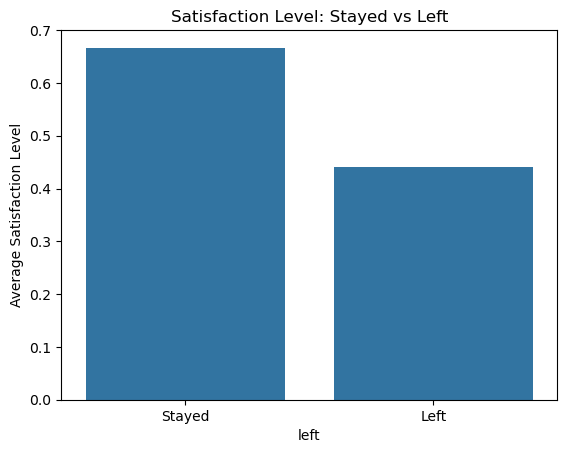

In [9]:
# TASK2_a SATISFACTION LEVEL FOR THE PEOPLE KEFT THE COMPANY
satisfaction = df.groupby('left')['satisfaction_level'].mean()
print(satisfaction)

# Plot
sns.barplot(x=satisfaction.index, y=satisfaction.values)
plt.xticks([0, 1], ['Stayed', 'Left'])  # Use tick positions 0 and 1
plt.ylabel("Average Satisfaction Level")
plt.title("Satisfaction Level: Stayed vs Left")
plt.show()

C:\Users\akshi\AppData\Local\Temp\ipykernel_6076\1176034111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction = df.groupby('left')['average_monthly_hours'].mean()


left
0    199.060203
1    207.419210
Name: average_monthly_hours, dtype: float64


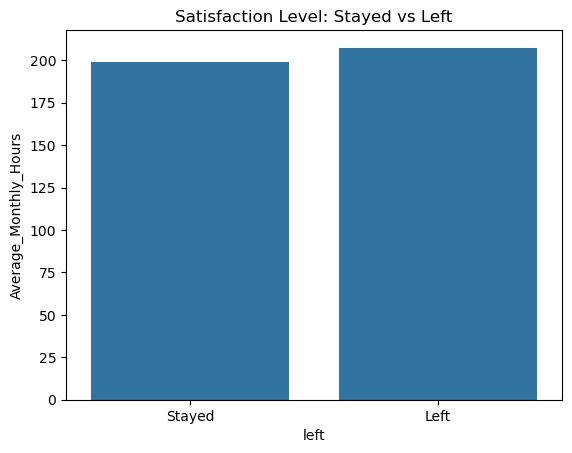

In [10]:
# TASK2_bAVG MONTHLY HOURS FOR THE left people
satisfaction = df.groupby('left')['average_monthly_hours'].mean()
print(satisfaction)

# Plot
sns.barplot(x=satisfaction.index, y=satisfaction.values)
plt.xticks([0, 1], ['Stayed', 'Left'])  # Use tick positions 0 and 1
plt.ylabel("Average_Monthly_Hours")
plt.title("Satisfaction Level: Stayed vs Left")
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

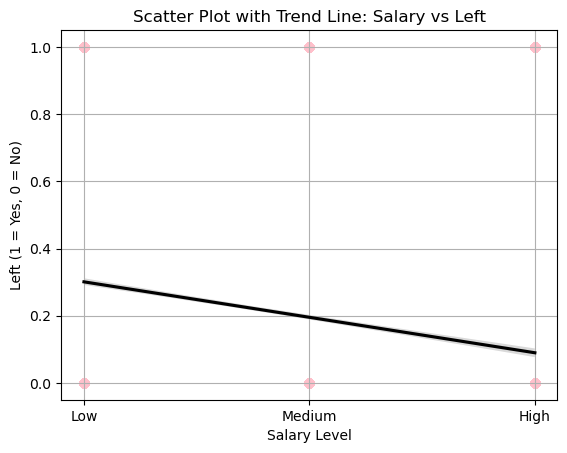

In [12]:
# TASK2C
import seaborn as sns
import matplotlib.pyplot as plt

# If salary is categorical, convert it to numeric
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df['salary_mapped'] = df['salary'].map(salary_map)

# Scatter plot with regression line
sns.regplot(x="salary_mapped", y="left", data=df, scatter_kws={'color': 'pink', 'alpha': 0.6}, line_kws={'color': 'black'})
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.xlabel("Salary Level")
plt.ylabel("Left (1 = Yes, 0 = No)")
plt.title("Scatter Plot with Trend Line: Salary vs Left")
plt.grid(True)
plt.show()


In [13]:
# TASK2_D
dept_rentention = df.groupby("Department")["left"].value_counts()
dept_rentention

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: count, dtype: int64

In [14]:
# TASK3
category = df.select_dtypes(exclude = ["number"])
numerical = df.select_dtypes(include = ["number"])
print(category)
print(numerical)

      Work_accident left promotion_last_5years Department  salary
0                 0    1                     0      sales     low
1                 0    1                     0      sales  medium
2                 0    1                     0      sales  medium
3                 0    1                     0      sales     low
4                 0    1                     0      sales     low
...             ...  ...                   ...        ...     ...
14994             0    1                     0    support     low
14995             0    1                     0    support     low
14996             0    1                     0    support     low
14997             0    1                     0    support     low
14998             0    1                     0    support     low

[14999 rows x 5 columns]
       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5

In [15]:
from sklearn import preprocessing
label_obj = preprocessing.LabelEncoder()
for col in category:
    category[col] = label_obj.fit_transform(category[col])

In [16]:
# TASK 3_B
# NO MISSING VALUE TREATMENT IS REQUIRED AS THERE ARE NO NULL VALUES

In [17]:
numerical

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_mapped
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,1
2,0.11,0.88,7,272,4,1
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0
...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0
14995,0.37,0.48,2,160,3,0
14996,0.37,0.53,2,143,3,0
14997,0.11,0.96,6,280,4,0


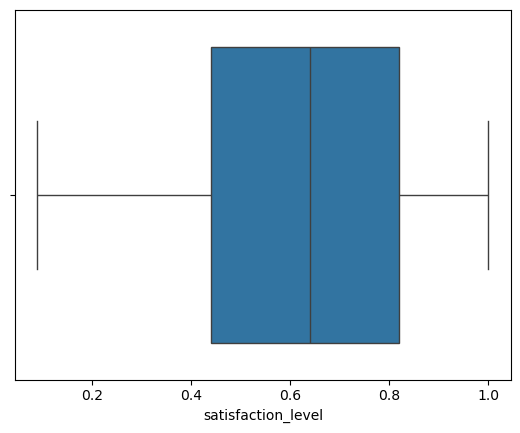

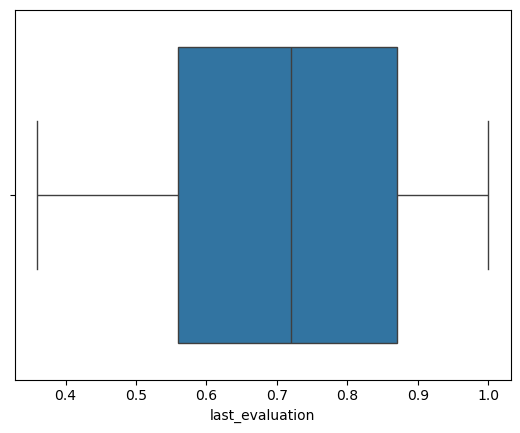

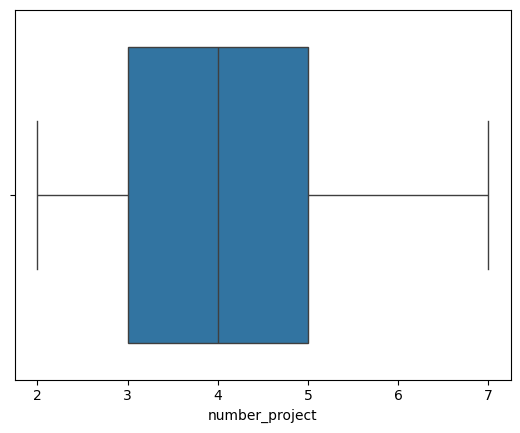

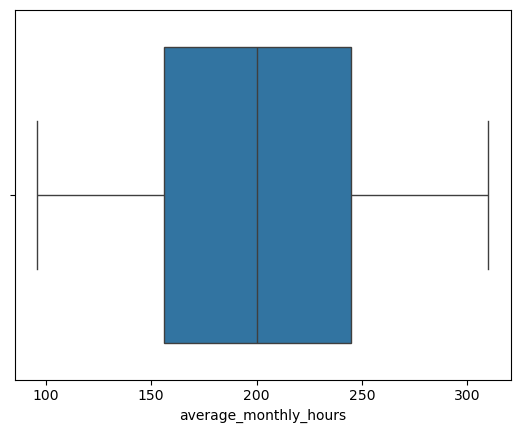

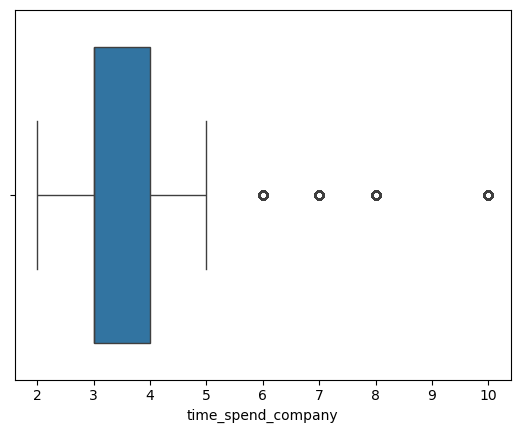

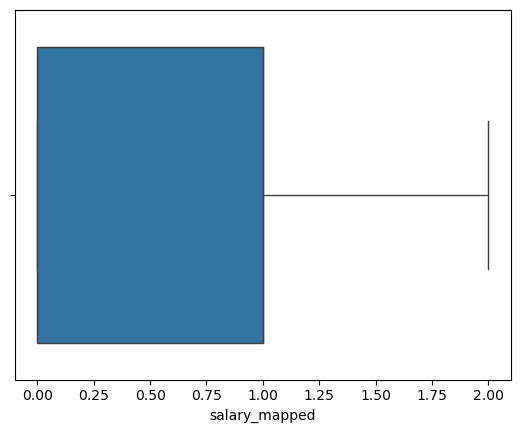

In [18]:
# Task3_C
for i in numerical.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [19]:
# TASK 3_D
from sklearn.preprocessing import StandardScaler
def scaling_numeric():
    data_types = ["int64","float64"]
    new_df = df.select_dtypes(include = data_types)
    
    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

In [20]:
df_scaled = scaling_numeric()
df_scaled

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_mapped
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.933368
...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.933368
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.933368
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.933368
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.933368


In [21]:
df_scaled

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_mapped
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.933368
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.933368
...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.933368
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.933368
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.933368
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.933368


In [22]:
category

,Work_accident,left,promotion_last_5years,Department,salary
0,0,1,0,7,1
1,0,1,0,7,2
2,0,1,0,7,2
3,0,1,0,7,1
4,0,1,0,7,1
...,...,...,...,...,...
14994,0,1,0,8,1
14995,0,1,0,8,1
14996,0,1,0,8,1
14997,0,1,0,8,1


In [23]:
final_df = pd.concat([df_scaled,category],axis = 1) # axis = 1 joining by column, 0 by row
final_df 

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_mapped,Work_accident,left,promotion_last_5years,Department,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368,0,1,0,7,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.636092,0,1,0,7,2
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092,0,1,0,7,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.933368,0,1,0,7,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.933368,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.933368,0,1,0,8,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.933368,0,1,0,8,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.933368,0,1,0,8,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.933368,0,1,0,8,1


In [3]:
# TASK 3_C
no_outlier = final_df.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

NameError: name 'df1_scaled' is not defined

In [5]:
# Apply to numeric columns only
# Apply to numeric columns only
numeric_cols = no_outlier.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    outlier_cleanup(col)



NameError: name 'no_outlier' is not defined

In [26]:
no_outlier = no_outlier.drop(["left"], axis=1)
no_outlier

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_mapped,Work_accident,promotion_last_5years,Department,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.933368,0,0,7,1
1,0.752814,0.840707,0.971113,1.220423,1.370991,0.636092,0,0,7,2
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.636092,0,0,7,2
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.933368,0,0,7,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.933368,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.933368,0,0,8,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.933368,0,0,8,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.933368,0,0,8,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.933368,0,0,8,1


In [27]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# TASK 3_e
def my_vif(x):
    vif = pd.Series(dtype='float64', name='vif')
    for i in range(x.shape[1]):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

In [29]:
vif_values = my_vif(no_outlier)
vif_values.sort_values(ascending=False)


salary                   3.081524
Department               3.070339
number_project           1.369507
average_monthly_hours    1.281024
last_evaluation          1.245857
Work_accident            1.156473
time_spend_company       1.124576
satisfaction_level       1.077453
promotion_last_5years    1.031868
salary_mapped            1.030299
Name: vif, dtype: float64

<Axes: >

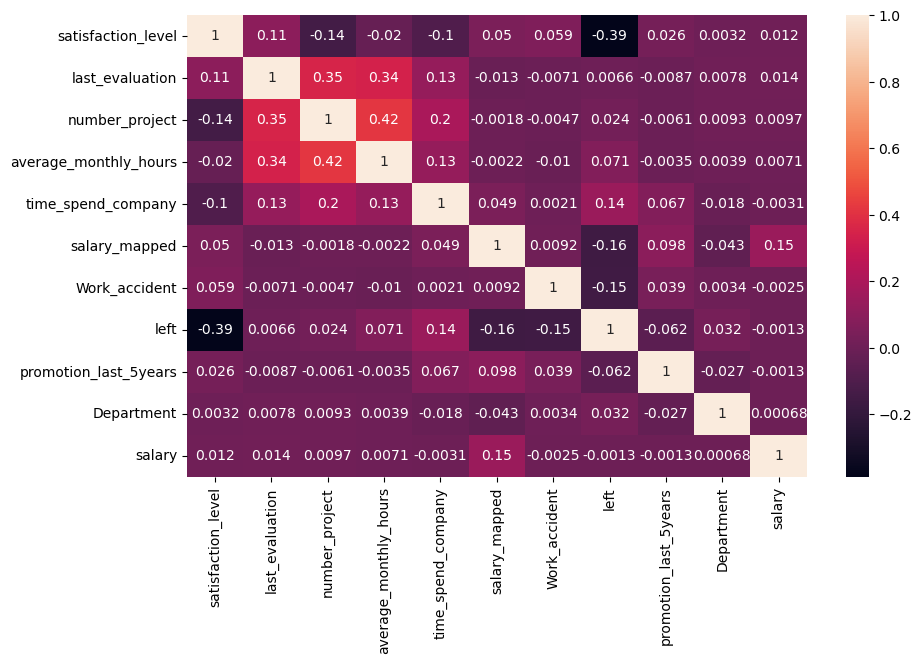

In [30]:
fig,ax= plt.subplots(figsize = (10,6))
sns.heatmap(final_df.corr(),annot = True)

In [31]:
x = final_df[['time_spend_company','Work_accident','number_project','satisfaction_level','salary_mapped']].to_numpy().reshape(-1,5)

In [97]:
final_df["time_spend_company"]

0       -0.341235
1        1.713436
2        0.343655
3        1.028546
4       -0.341235
           ...   
14994   -0.341235
14995   -0.341235
14996   -0.341235
14997    0.343655
14998   -0.341235
Name: time_spend_company, Length: 14999, dtype: float64

In [32]:
y = np.array(final_df['left']).reshape(-1,1)

In [33]:
# TASK4_a
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)

In [34]:
# Task4_b
from sklearn.linear_model import LogisticRegression
# Building the model
logreg = LogisticRegression()
# Training The Model
logreg.fit(x_train,y_train)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
# CHECKING TRAINING PERFORMANCE
logreg.score(x_train,y_train)

0.8072197352128774

In [36]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8024444444444444


In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[3173  255]
 [ 634  438]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3428
           1       0.63      0.41      0.50      1072

    accuracy                           0.80      4500
   macro avg       0.73      0.67      0.69      4500
weighted avg       0.79      0.80      0.79      4500



In [40]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred,average = "weighted"))

0.7864082046168481


In [41]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

0.8027612811090405


In [42]:
y_probas = logreg.predict_proba(x_test)
y_probas

array([[0.97881829, 0.02118171],
       [0.90147966, 0.09852034],
       [0.81088   , 0.18912   ],
       ...,
       [0.82654317, 0.17345683],
       [0.9692616 , 0.0307384 ],
       [0.9375606 , 0.0624394 ]])

In [43]:
from sklearn.metrics import roc_curve

In [44]:
from matplotlib import pyplot

In [45]:
lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]

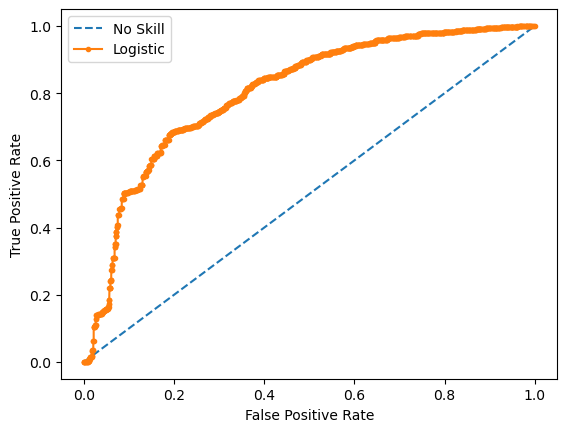

In [46]:
lr_probs = y_probas[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [47]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6320346320346321
Recall: 0.4085820895522388


In [48]:
# F1 score = 78%
# Precision: 63%
# Recall = 40
# roc-auc_score = 80%